In [1]:
# Importing necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import LSTM
from sklearn.model_selection import train_test_split
from collections import Counter

In [2]:
# 1. Load the IMDB dataset
max_features = 10000  # Vocabulary size
max_len = 200  # Maximum sequence length

In [3]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)

print(f"Training samples: {len(X_train)}, Test samples: {len(X_test)}")



17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training samples: 25000, Test samples: 25000


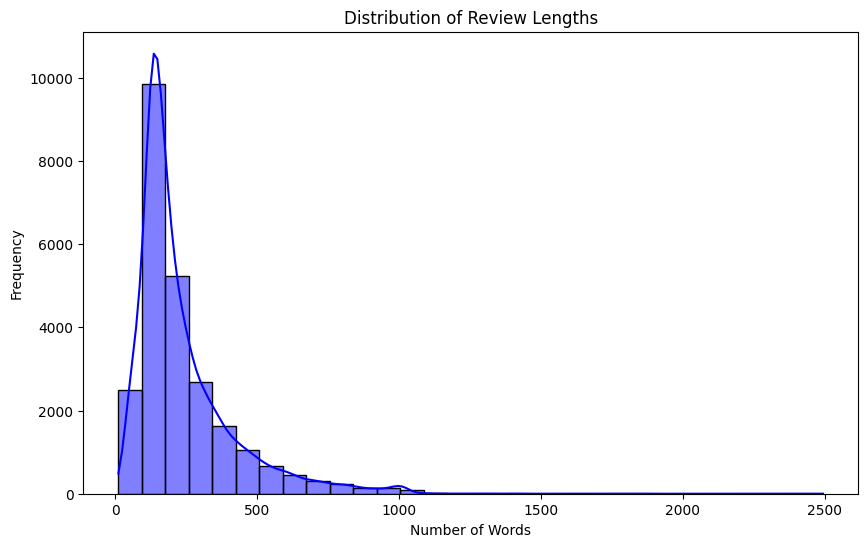

In [4]:
# 2. Exploratory Data Analysis (EDA)
# 2.1 Distribution of review lengths
review_lengths = [len(review) for review in X_train]
plt.figure(figsize=(10, 6))
sns.histplot(review_lengths, bins=30, kde=True, color='blue')
plt.title("Distribution of Review Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


<ipython-input-5-6da991ee1c28>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Negative", "Positive"], y=[sentiment_counts[0], sentiment_counts[1]], palette="viridis")


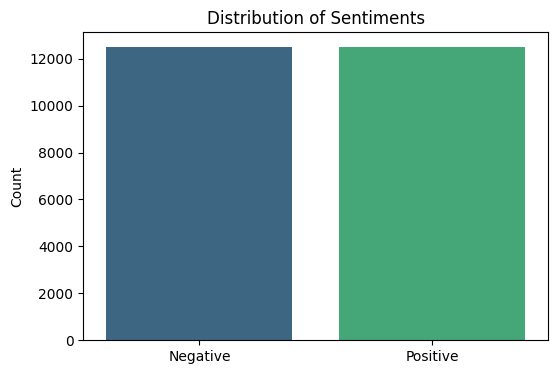

In [5]:
# 2.2 Distribution of sentiments
sentiment_counts = Counter(y_train)
plt.figure(figsize=(6, 4))
sns.barplot(x=["Negative", "Positive"], y=[sentiment_counts[0], sentiment_counts[1]], palette="viridis")
plt.title("Distribution of Sentiments")
plt.ylabel("Count")
plt.show()

In [6]:
# 3. Preprocess the data
X_train = pad_sequences(X_train, maxlen=max_len, padding='post', truncating='post')
X_test = pad_sequences(X_test, maxlen=max_len, padding='post', truncating='post')

In [7]:
print(f"First training sample after padding: {X_train[0]}")


First training sample after padding: [   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51

In [8]:
# 4. Build the RNN model
model = Sequential([
    Embedding(max_features, 64, input_length=max_len),
    SimpleRNN(32, return_sequences=False, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
# 5. Train the model
history = model.fit(
    X_train, y_train,
    epochs=5,  # Reduced for demonstration
    batch_size=64,
    validation_split=0.2,
    verbose=1
)


Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - accuracy: 0.5010 - loss: 0.7207 - val_accuracy: 0.4890 - val_loss: 0.6949
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.5004 - loss: 0.6994 - val_accuracy: 0.4970 - val_loss: 0.6935
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.5160 - loss: 0.6931 - val_accuracy: 0.4948 - val_loss: 0.6945
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.5317 - loss: 0.6899 - val_accuracy: 0.5016 - val_loss: 0.6937
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.5317 - loss: 0.6890 - val_accuracy: 0.5068 - val_loss: 0.6926


In [11]:
# 6. Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_acc:.2f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.5079 - loss: 0.6931
Test Accuracy: 0.51


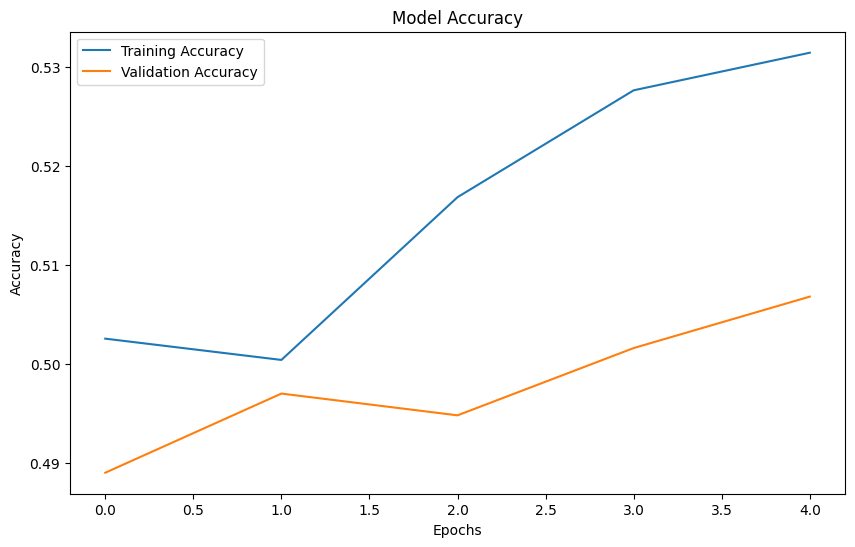

In [12]:
# 7. Visualizations of training results
# Plotting accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

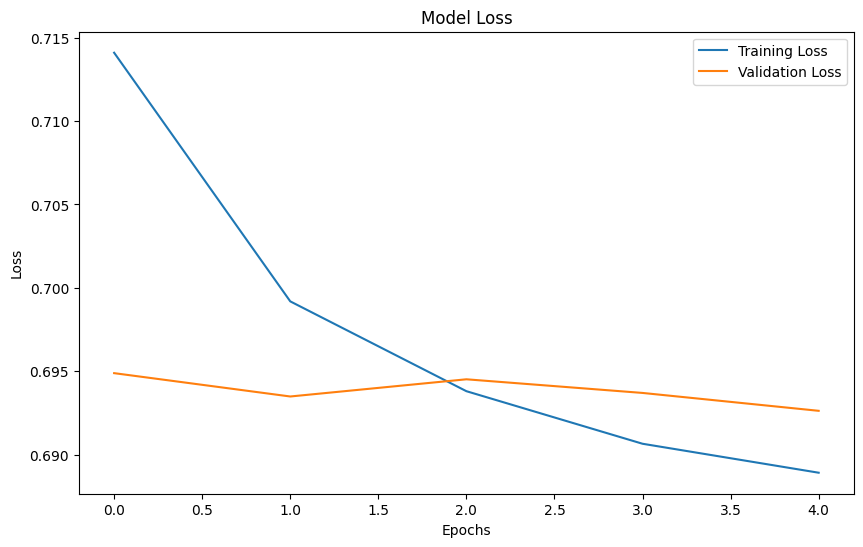

In [13]:
# Plotting loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [14]:
# 8. Predictions on test data
predictions = model.predict(X_test)
predictions_binary = (predictions >= 0.5).astype(int)

782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step


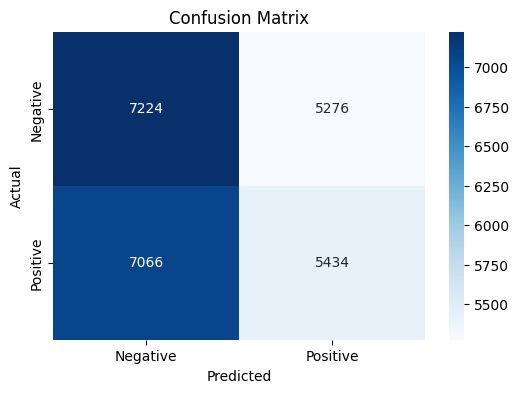

In [15]:
# 9. Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
conf_matrix = confusion_matrix(y_test, predictions_binary)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [16]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, predictions_binary))

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.58      0.54     12500
           1       0.51      0.43      0.47     12500

    accuracy                           0.51     25000
   macro avg       0.51      0.51      0.50     25000
weighted avg       0.51      0.51      0.50     25000



In [17]:
# 10. Make predictions on a new review
sample_review = "This movie was fantastic! The acting was great, the plot was engaging, and the visuals were stunning."
# Tokenizing and preprocessing the sample review
sample_review_seq = [imdb.get_word_index().get(word, 0) for word in sample_review.lower().split()]
sample_review_padded = pad_sequences([sample_review_seq], maxlen=max_len, padding='post', truncating='post')
predicted_sentiment = model.predict(sample_review_padded)[0][0]

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


In [18]:
if predicted_sentiment >= 0.5:
    print(f"Predicted Sentiment: Positive ({predicted_sentiment:.2f})")
else:
    print(f"Predicted Sentiment: Negative ({predicted_sentiment:.2f})")

Predicted Sentiment: Negative (0.49)


## **Hyperparameter Tuning**

In [19]:
X_train_partial, X_val, y_train_partial, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [20]:
# Function to build and compile models with hyperparameters
def build_model(rnn_units=32, dropout_rate=0.2, optimizer='adam'):
    model = Sequential([
        Embedding(max_features, 64, input_length=max_len),
        LSTM(rnn_units, dropout=dropout_rate, recurrent_dropout=dropout_rate, return_sequences=False),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define hyperparameters to tune
hyperparams = [
    {'rnn_units': 32, 'dropout_rate': 0.2, 'optimizer': 'adam'},
    {'rnn_units': 64, 'dropout_rate': 0.3, 'optimizer': 'adam'},
    {'rnn_units': 128, 'dropout_rate': 0.4, 'optimizer': 'adam'},
    {'rnn_units': 64, 'dropout_rate': 0.2, 'optimizer': 'rmsprop'},
]

In [21]:
# Store results for comparison
results = []

for params in hyperparams:
    print(f"Training model with params: {params}")
    model = build_model(**params)
    history = model.fit(
        X_train_partial, y_train_partial,
        epochs=5,  # Reduced for demonstration
        batch_size=64,
        validation_data=(X_val, y_val),
        verbose=1
    )
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
    results.append({
        'params': params,
        'history': history.history,
        'test_loss': test_loss,
        'test_acc': test_acc
    })

Training model with params: {'rnn_units': 32, 'dropout_rate': 0.2, 'optimizer': 'adam'}
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


313/313 ━━━━━━━━━━━━━━━━━━━━ 120s 358ms/step - accuracy: 0.5231 - loss: 0.6913 - val_accuracy: 0.5200 - val_loss: 0.6799
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 113s 361ms/step - accuracy: 0.5694 - loss: 0.6744 - val_accuracy: 0.6690 - val_loss: 0.6275
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 143s 366ms/step - accuracy: 0.6306 - loss: 0.6422 - val_accuracy: 0.6852 - val_loss: 0.6161
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 138s 354ms/step - accuracy: 0.7016 - loss: 0.5700 - val_accuracy: 0.5790 - val_loss: 0.6602
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 144s 359ms/step - accuracy: 0.6640 - loss: 0.5500 - val_accuracy: 0.7680 - val_loss: 0.5403
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 86ms/step - accuracy: 0.7601 - loss: 0.5556
Training model with params: {'rnn_units': 64, 'dropout_rate': 0.3, 'optimizer': 'adam'}
Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 116s 363ms/step - accuracy: 0.5012 - loss: 0.6932 - val_accuracy: 0.5438 - val_loss: 0.6878
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 140s 359ms/step - ac

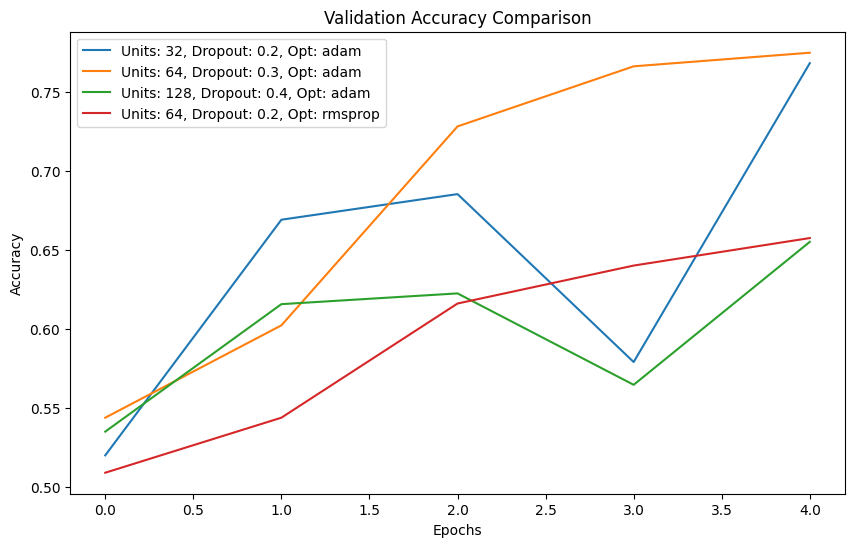

In [22]:
# Visualization of results
plt.figure(figsize=(10, 6))

# Accuracy comparison
for res in results:
    plt.plot(res['history']['val_accuracy'], label=f"Units: {res['params']['rnn_units']}, Dropout: {res['params']['dropout_rate']}, Opt: {res['params']['optimizer']}")

plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

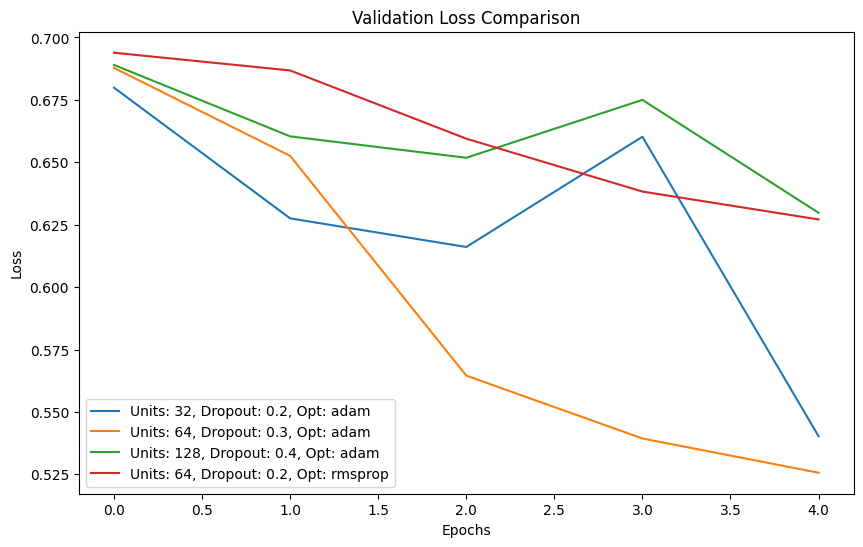

In [23]:
# Loss comparison
plt.figure(figsize=(10, 6))
for res in results:
    plt.plot(res['history']['val_loss'], label=f"Units: {res['params']['rnn_units']}, Dropout: {res['params']['dropout_rate']}, Opt: {res['params']['optimizer']}")

plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [24]:
# Display final test accuracies for each configuration
print("Hyperparameter Tuning Results:")
for res in results:
    print(f"Params: {res['params']}, Test Accuracy: {res['test_acc']:.2f}, Test Loss: {res['test_loss']:.2f}")

Hyperparameter Tuning Results:
Params: {'rnn_units': 32, 'dropout_rate': 0.2, 'optimizer': 'adam'}, Test Accuracy: 0.76, Test Loss: 0.56
Params: {'rnn_units': 64, 'dropout_rate': 0.3, 'optimizer': 'adam'}, Test Accuracy: 0.76, Test Loss: 0.54
Params: {'rnn_units': 128, 'dropout_rate': 0.4, 'optimizer': 'adam'}, Test Accuracy: 0.64, Test Loss: 0.64
Params: {'rnn_units': 64, 'dropout_rate': 0.2, 'optimizer': 'rmsprop'}, Test Accuracy: 0.66, Test Loss: 0.63
